In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Replace the path with the correct path for your data.
df = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
categorical = df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())
    print('')

id
421097

term
2

int_rate
110

grade
7

sub_grade
35

emp_title
120812

emp_length
11

home_ownership
4

verification_status
3

issue_d
12

loan_status
7

pymnt_plan
1

url
421095

desc
34

purpose
14

title
27

zip_code
914

addr_state
49

earliest_cr_line
668

revol_util
1211

initial_list_status
2

last_pymnt_d
25

next_pymnt_d
4

last_credit_pull_d
26

application_type
2

verification_status_joint
3



In [5]:
# Convert ID and Interest Rate to numeric.
df['id'] = pd.to_numeric(df['id'], errors='coerce')
df['int_rate'] = pd.to_numeric(df['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
df.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove two summary rows at the end that don't actually contain data.
df = df[:-2]

In [8]:
pd.get_dummies(df)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


## This is Thinkful's version

In [9]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

start_time = time.time()
rfc = ensemble.RandomForestClassifier()
X = df.drop('loan_status', 1)
Y = df['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

scores = cross_val_score(rfc, X, Y, cv=10)
print(scores)
print('Mean: {}'.format(scores.mean()))
print('This took {} seconds'.format(time.time() - start_time))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 

[0.9801952  0.97869915 0.98157251 0.9816675  0.96490145 0.9786274
 0.95753877 0.98055048 0.98045456 0.9800741 ]
Mean: 0.9764281111729968
This took -226.43938755989075 seconds


In [40]:
rfc.feature_importances_

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### As 'simple' as I can make it while maintaining 90% accuracy

In [10]:
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.explained_variance_ratio_

array([5.39819192e-02, 3.10090898e-02, 3.00102910e-02, 2.38085460e-02,
       1.89730386e-02, 1.61485790e-02, 1.58141780e-02, 1.46920093e-02,
       1.31939156e-02, 1.28921523e-02, 1.17054573e-02, 1.12642471e-02,
       1.06395200e-02, 1.03628127e-02, 1.02647375e-02, 1.01640595e-02,
       1.01311914e-02, 1.01063990e-02, 1.00783996e-02, 1.00563939e-02,
       1.00289809e-02, 9.86732751e-03, 9.76003149e-03, 9.50640203e-03,
       8.91364650e-03, 8.33104507e-03, 8.08788132e-03, 7.63605439e-03,
       7.54539264e-03, 7.40426756e-03, 7.26111289e-03, 7.18241713e-03,
       7.08061647e-03, 7.02475110e-03, 6.91971111e-03, 6.89686499e-03,
       6.83314402e-03, 6.79215039e-03, 6.68869513e-03, 6.66134453e-03,
       6.57991231e-03, 6.52806467e-03, 6.49043277e-03, 6.42358782e-03,
       6.37717837e-03, 6.33677893e-03, 6.27065098e-03, 6.25025725e-03,
       6.18572633e-03, 6.11502803e-03, 5.99628574e-03, 5.95964972e-03,
       5.88270206e-03, 5.85340690e-03, 5.82335632e-03, 5.81388937e-03,
      

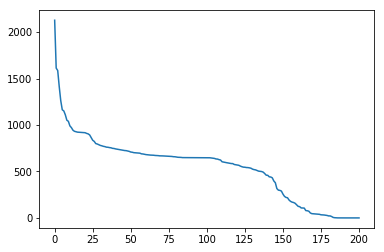

In [15]:
plt.plot(pca.singular_values_)
plt.show()

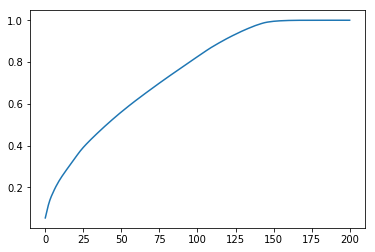

In [16]:
lst = [pca.explained_variance_ratio_[0]]

for i in range(1, len(pca.explained_variance_ratio_)):
    lst.append(pca.explained_variance_ratio_[i] + lst[i - 1])
    

plt.plot(lst)
plt.show()    

In [18]:
XP = pca.transform(X)[:, 0:25]

In [21]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()

start_time = time.time()

scores = cross_val_score(rfc, XP, Y, cv=10)
print('Array: {}'.format(scores))
print('Mean: {}'.format(scores.mean()))
print('This ran in {} seconds'.format(time.time() - start_time))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 

Array: [0.91650638 0.9262188  0.93092066 0.93362779 0.93229637 0.93234386
 0.9340996  0.93160607 0.93295652 0.92943998]
Mean: 0.9300016030907636
This ran in 403.45127034187317 seconds


This is still a high accuracy, but it longer than I was hoping to run!

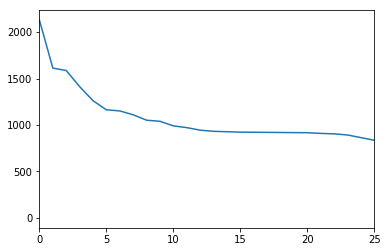

In [22]:
plt.plot(pca.singular_values_)
plt.xlim(left=0, right=25)
plt.show()

In [23]:
XP = pca.transform(X)[:, 0:5]

In [24]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()

start_time = time.time()

scores = cross_val_score(rfc, XP, Y, cv=10)
print('Array: {}'.format(scores))
print('Mean: {}'.format(scores.mean()))
print('This ran in {} seconds'.format(time.time() - start_time))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 

Array: [0.86488091 0.87680179 0.88926884 0.89734274 0.90009499 0.90187604
 0.90272863 0.89420314 0.87534139 0.81724695]
Mean: 0.8819785410816235
This ran in 155.091463804245 seconds


Almost at 90 but with way less run time! I think 25 is the winner with 40 seconds per run but still > 90% accuracy!